In [1]:
import pandas as pd

# Load the uploaded dataset to examine its structure and contents.
file_path = 'Team1ORIGNAL.csv'
data = pd.read_csv(file_path)

# Display basic information and first few rows for EDA.
data_info = data.info()
data_head = data.head()
data_shape = data.shape

data_info, data_shape, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1008 non-null   object 
 1   DayOfWeek      1008 non-null   int64  
 2   Period         1008 non-null   int64  
 3   NbrAppliances  1008 non-null   int64  
 4   Hour           1008 non-null   int64  
 5   KWH            1008 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 47.4+ KB


(None,
 (1008, 6),
          date  DayOfWeek  Period  NbrAppliances  Hour    KWH
 0  12/12/2013          4       4              0     1  0.000
 1  12/13/2013          4       4              0     2  0.002
 2  12/14/2013          4       4              2     3  0.088
 3  12/15/2013          4       4              2     4  0.111
 4  12/16/2013          4       4              2     5  0.109)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_38372\2243666846.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=data, palette='viridis')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_38372\2243666846.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NbrAppliances', data=data, palette='coolwarm')


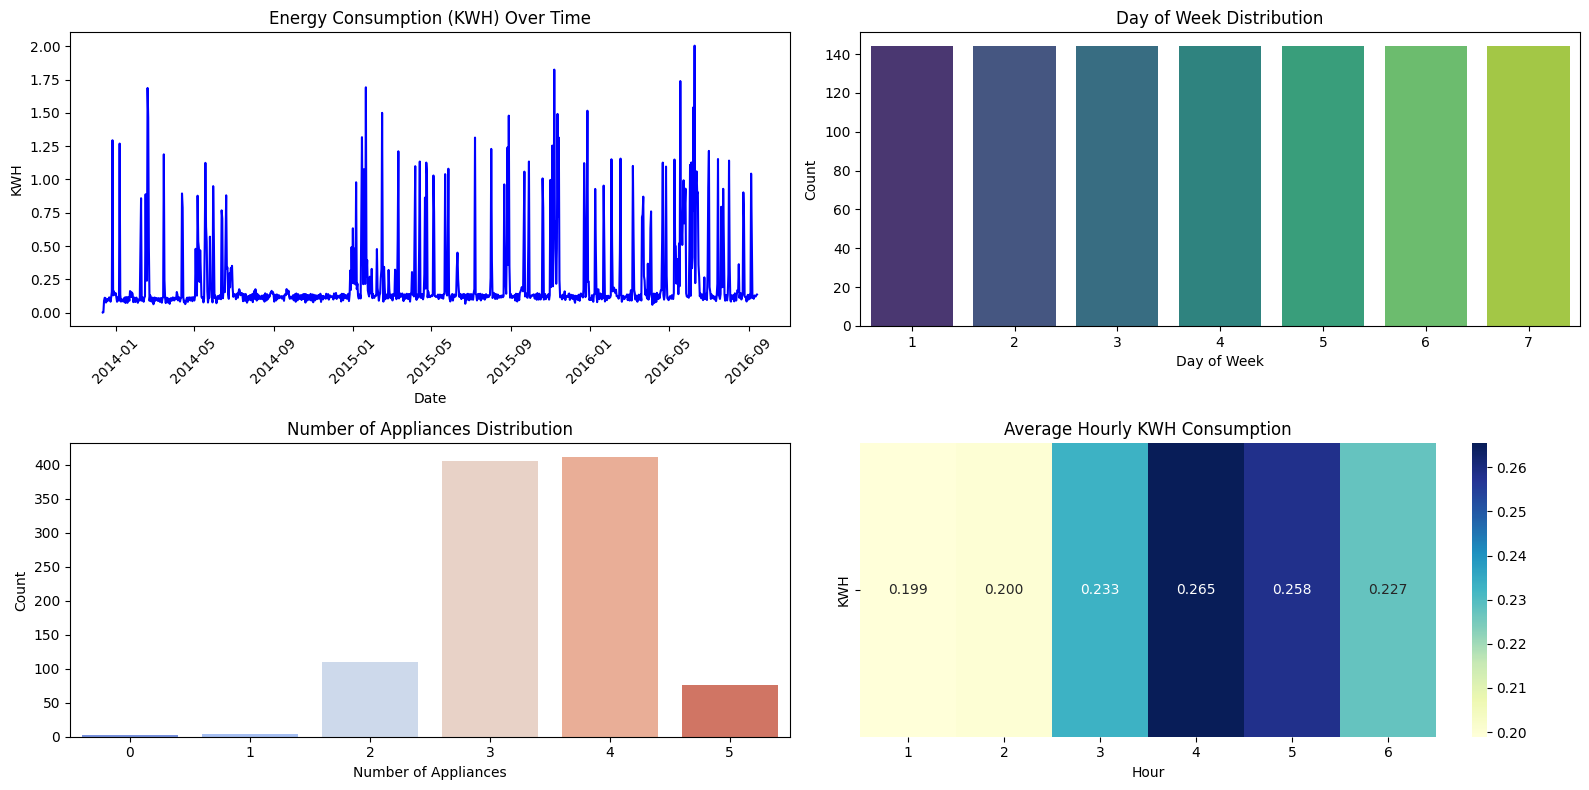

,date,DayOfWeek,Period,NbrAppliances,Hour,KWH
count,1008,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,2015-04-29 12:00:00,4.000000,2.500000,3.435516,3.500000,0.230537
min,2013-12-12 00:00:00,1.000000,1.000000,0.000000,1.000000,0.000000
25%,2014-08-20 18:00:00,2.000000,1.750000,3.000000,2.000000,0.108000
50%,2015-04-29 12:00:00,4.000000,2.500000,3.000000,3.500000,0.127000
75%,2016-01-06 06:00:00,6.000000,3.250000,4.000000,5.000000,0.157000
max,2016-09-14 00:00:00,7.000000,4.000000,5.000000,6.000000,2.006000
std,NaN,2.000993,1.118589,0.814350,1.708673,0.286294


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Cleaning
data['date'] = pd.to_datetime(data['date'])

# Step 2: Summary Statistics
summary_stats = data.describe()

# Step 3: Visualizations
plt.figure(figsize=(16, 8))

# Time series plot of KWH over time
plt.subplot(2, 2, 1)
plt.plot(data['date'], data['KWH'], color='blue')
plt.title('Energy Consumption (KWH) Over Time')
plt.xlabel('Date')
plt.ylabel('KWH')
plt.xticks(rotation=45)

# Bar plot for DayOfWeek distribution
plt.subplot(2, 2, 2)
sns.countplot(x='DayOfWeek', data=data, palette='viridis')
plt.title('Day of Week Distribution')
plt.xlabel('Day of Week')
plt.ylabel('Count')

# Bar plot for NbrAppliances distribution
plt.subplot(2, 2, 3)
sns.countplot(x='NbrAppliances', data=data, palette='coolwarm')
plt.title('Number of Appliances Distribution')
plt.xlabel('Number of Appliances')
plt.ylabel('Count')

# Heatmap for hourly KWH consumption
hourly_kwh = data.groupby('Hour')['KWH'].mean().reset_index()
plt.subplot(2, 2, 4)
sns.heatmap(hourly_kwh.set_index('Hour').T, annot=True, cmap='YlGnBu', cbar=True, fmt='.3f')
plt.title('Average Hourly KWH Consumption')
plt.xlabel('Hour')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Outputs for data cleaning and summary statistics
summary_stats


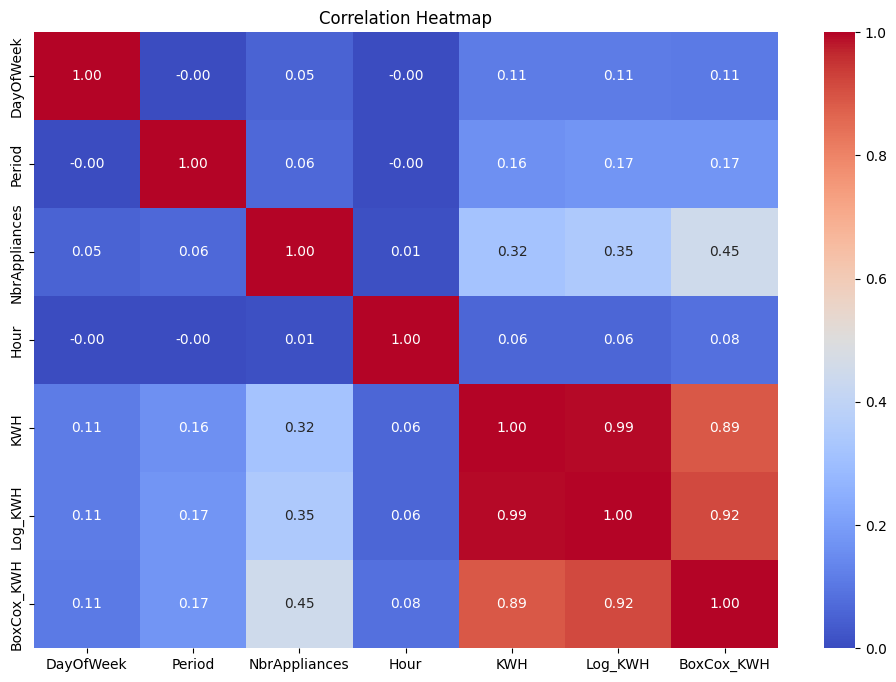

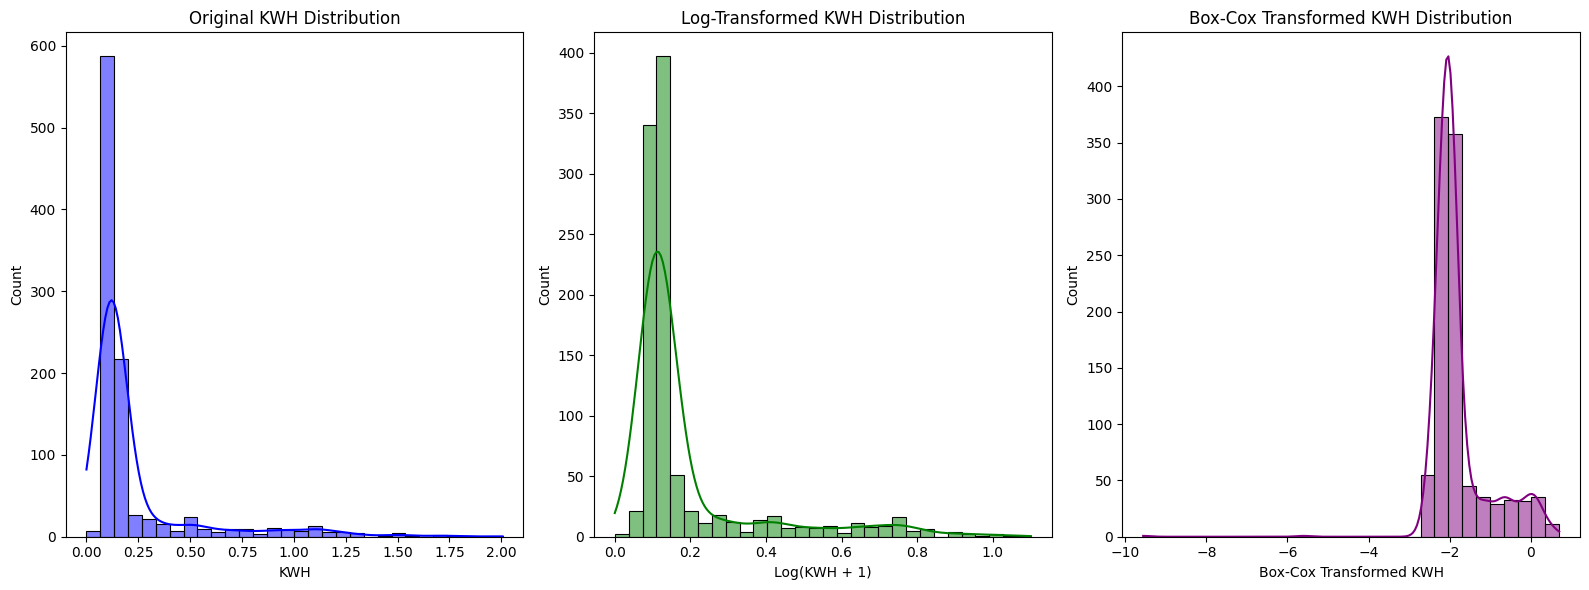

(np.float64(0.5228520346538696),
 np.float64(8.671271952829144e-46),
 np.float64(633.8396194227961),
 np.float64(2.3092738437983196e-138),
 np.float64(0.033341413814486666))

In [3]:
from scipy.stats import shapiro, normaltest, boxcox
import numpy as np

# Step 1: Check Normality of 'KWH'
kwh_data = data['KWH']

# Shapiro-Wilk test for normality
shapiro_test_stat, shapiro_p_value = shapiro(kwh_data)

# D'Agostino and Pearson's test for normality
dagostino_test_stat, dagostino_p_value = normaltest(kwh_data)

# Step 2: Transform 'KWH' to approximate normality (using log and Box-Cox transformations)
data['Log_KWH'] = np.log1p(kwh_data)  # Adding 1 to avoid log(0)
data['BoxCox_KWH'], lambda_param = boxcox(kwh_data + 1e-5)  # Add small value to avoid Box-Cox issues

# Step 3: Heatmap of Correlation
correlation_matrix = data[['DayOfWeek', 'Period', 'NbrAppliances', 'Hour', 'KWH', 'Log_KWH', 'BoxCox_KWH']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Distribution Comparison Before and After Transformations
plt.figure(figsize=(16, 6))

# Original Distribution
plt.subplot(1, 3, 1)
sns.histplot(kwh_data, kde=True, color='blue', bins=30)
plt.title('Original KWH Distribution')
plt.xlabel('KWH')

# Log Transformed Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Log_KWH'], kde=True, color='green', bins=30)
plt.title('Log-Transformed KWH Distribution')
plt.xlabel('Log(KWH + 1)')

# Box-Cox Transformed Distribution
plt.subplot(1, 3, 3)
sns.histplot(data['BoxCox_KWH'], kde=True, color='purple', bins=30)
plt.title('Box-Cox Transformed KWH Distribution')
plt.xlabel('Box-Cox Transformed KWH')

plt.tight_layout()
plt.show()

# Output test results and lambda parameter for Box-Cox
(shapiro_test_stat, shapiro_p_value, dagostino_test_stat, dagostino_p_value, lambda_param)


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew

# Step 1: Calculate VIF for numerical predictors
numerical_features = ['DayOfWeek', 'Period', 'NbrAppliances', 'Hour']
X = data[numerical_features]

# Add a constant column for VIF calculation (if required)

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Step 2: Calculate skewness for KWH and transformed data
skewness_values = {
    "Original KWH": skew(data['KWH']),
    "Log Transformed KWH": skew(data['Log_KWH']),
    "Box-Cox Transformed KWH": skew(data['BoxCox_KWH'])
}

vif_data, skewness_values


(         Feature       VIF
 0      DayOfWeek  4.475131
 1         Period  5.234011
 2  NbrAppliances  8.973024
 3           Hour  4.498915,
 {'Original KWH': np.float64(2.956676135854955),
  'Log Transformed KWH': np.float64(2.5218971933541097),
  'Box-Cox Transformed KWH': np.float64(0.14107439238548872)})